In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)


# 과제물_인공신경망

- 머신러닝에서 신경망은 인공신경망을 의미하며 생물학적 신경망 네트워크를 기계학급과 인지과학을 통해 수학적으로 표현한 모델을 의미한다. 

## 다층신경망

- 입력층을 제외한 층을 2개 이상 포함하는 NN이다. 이때 입력층과 출력층을 제외한 모든 층을 은닉층이라 한다. 

In [2]:
df_raw = pd.read_csv('/home/piai/test/2. Big Data 분석/유방암.csv', encoding='cp949')

In [3]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [5]:
df_raw.shape

(320, 31)

In [6]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- 유방암 데이터는 총 31개의 칼럼으로 이루어져 있으며 총 데이터의 행의 개수는 320개이다. 유방암 데이터 셋의 피쳐들은 유방암 세포 특징에 대한 것이다.

- diagnosis : 양성 여부
- radius : 반경(중심에서 외벽까지 거리들의 평균 값)
- texture : 질감(gray-scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- compactness : 조그만 정도 (둘레^2/면적 -1)
- concavity : 오목함
- concave_points : 오목함 점의 수
- symmetry : 대칭
- fractal_dimension : 프렉탈 차원

# 1-0) 목표변수 빈도확인 

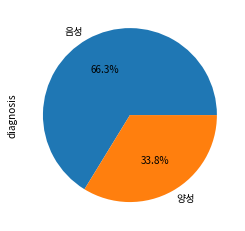

In [7]:
df_raw['diagnosis'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

**불균형자료**

: 목표변수의 분포가 매우 치우친, 즉 관심있는 값의 빈도가 매우 작은 자료로 모델을 사용하여서 예측을 하면 정확도(accuracy)는 높지만 재현율(recall, 실제 1을 1로 분류할 확률)이 급격히 작아져 모델의 성능이 안좋아진다.

: 해결방법에는 정상자료는 일부만 사용하고 관심자료는 전부 사용하는 Under-sampling, 정상자료를 전부 사용하고 관심자료를 복제하는 Over-sampling, 정상자료 및 관심자료를 둘 다 줄이고 늘리는 Both-sampling, 기존 데이터의 성격을 크게 해치지 않는 범위에서 새로운 것을 만들어내는 Synthetic 등의 방법이 있다.

- 불균형 자료를 해결하기 전에 train dataset과 test dataset을 나눠야하는데 이는 train 데이터로 모델을 학습시키고 학습시킨 모델을 test 데이터로 성능을 평가하기 때문이다. 만약 데이터를 나누기 전에 데이터를 복제해버리면 train data와 test data에 동일한 데이터가 들어가 모델의 성능이 지나치게 높게 보일 수도 있다.

- 보통은 9:1로 기준을 설정한다.

- 현재 분석대상인 유방암 데이터의 음성과 양성을 pie plot으로 비교해 보았을 때 음성 66:34로 비율이 그렇게 큰 차이가 나지는 않아 따로 Oversampling이나 Undersampling을 진행하지 않는다.

# 1) 데이터 구성하기 - 데이터 분할(6:4)

- 데이터를 분할할 때 6:4, 7:3, 8:2 와 같은 기준은 데이터분석가가 임의로 정하는데 이는 학습할 데이터의 양에 따라 결정된다. 예를 들어 전체 데이터 개수가 엄청 많은 경우 6:4로 분할하여도 학습할 데이터 수가 충분히 많기 때문에 테스트 데이터를 많이 두어 모델의 일반화 성능을 보는 것이 좋을테지만 데이터 수가 적을 경우 모델이 충분히 학습하는 것이 중요하기 때문에 8:2 로 split하는 경우도 있다. 이 과제에서는 6:4로 split 하라고 명시되어있으니 6:4로 split하였다.

In [8]:
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print('분할 전 설명변수 데이터:' ,df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape,'Test', df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터:Train (192, 30) Test (128, 30)


In [9]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.901
Accuracy on test set: 0.930


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 기본 default MlP의 train set 성능은 0.901이고 test set 성능은 0.930이다. train의 성능도 좋지만 test의 성능이 이보다 높은 것을 보아 과적합은 아닌것을 알 수 있다.

# 1. 은닉층 변경

- 은닉층 개수와 층별 노드 개수를 지정하는데 은닉층이 복잡할수록 모델의 과대적합 경향성이 나타난다. 

## 1-1. 은닉층 1개

In [10]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]
for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.401,0.242
1,40,0.594,0.758
2,60,0.917,0.930
3,80,0.932,0.898
4,100,0.901,0.930
5,120,0.599,0.758
6,140,0.599,0.758
7,160,0.599,0.758


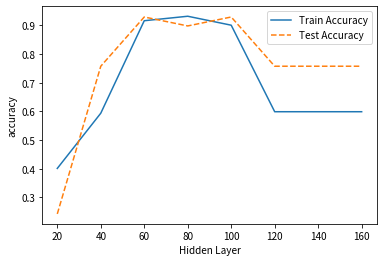

In [12]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

- train, test 데이터셋 모두 은닉층이 Hidden Layer의 노드수가 늘어나면서 Accuracy가 증가하는 모습을 보이다 Hidden Layer의 노드수가 100이 넘어가면 정확도가 급격히 낮아지다가 수렴하는 것을 볼 수 있다. 

## 1-2. 은닉층 2개

In [13]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]
for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.932,0.891
1,40,0.911,0.906
2,60,0.870,0.852
3,80,0.932,0.898
4,100,0.599,0.758
5,120,0.922,0.930
6,140,0.854,0.781
7,160,0.771,0.672


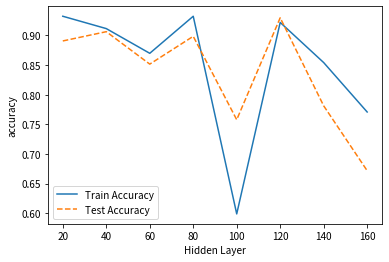

In [15]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

- train, test 데이터셋 모두 은닉층이 Hidden Layer들의 노드수에 따라서 같은 경향을 보이지 않고 정확도가 불안정한 것을 볼 수 있다. 

- 이는 정확하게 해석할 수 없는데 이것은 NN가 black box모델로 모델이 어떻게 작동하는지 정확히 모르기 때문이다. 컴퓨팅 파워가 좋다면 각 파라미터 별로 최적의 값을 찾을 수 있기 때문에 딥러닝에서는 컴퓨팅 파워가 매우 중요하다.

# 2. activation function 변경

- 활성화 함수
: 입력층 또는 이전의 은닉층의 정보를 다음 층으로 전달할때 출력값을 정하는 함수이다. 
: 기존 모델들의 선형성을 보완하기 위해 비선형 함수를 사용한다.

In [16]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']
for v_function in para_function:
    nn = MLPClassifier(activation=v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.948,0.898
1,tanh,0.958,0.891
2,relu,0.901,0.930


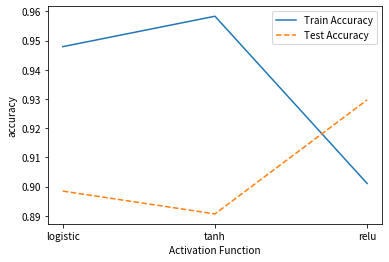

In [18]:
plt.plot(para_function, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

- 활성화 함수가 logistic 일 경우 TrainAccuracy는 0.948이고 TestAccuracy는 0.898이다. tanh의 경우 TrainAccuracy는 0.958이고 TestAccuracy는 0.891이다. relu일 경우 TrainAccuracy는 0.901이고 TestAccuracy는 0.930이다. 변수 스케일링이 필요하다.

## scale 변환 - standard scaler

In [19]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [20]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


# 스케일 변환 후 기본 default model

In [21]:
df_train_y.shape

(192,)

In [22]:
df_scaled_train_x.shape

(192, 30)

In [23]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 스케일링을 진행한 결과 스케일링 이전 기본 default MlP의 train set 성능은 0.901이고 test set 성능은 0.930보다 상당히 개선된 것을 볼 수 있다. train set 성능은 0.995이고 test set 성능은 0.953으로 성능 향상을 보인다. 이것으로 추가 모델링을 진행하고자 한다.

# 1. scaler 적용 후 은닉층 변경

In [24]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 11)]
for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


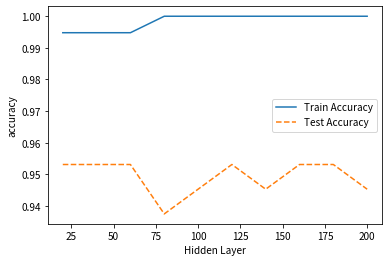

In [26]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

- 두개의 은닉층의 노드수를 변경하면서 시각화를 해본 결과 train dataset은 노드수가 80이 넘어가면 1로 수렴하고 test dataset은 정확도가 뛰는 과적합이 일어난다. 그렇기 때문에 train dataset과 test dataset의 성능의 차이가 적은 60으로 설정한다. 하지만 이 또한 과적합일 가능성이 높다.

# 2. scaler 적용 후 활성화함수 변경

In [27]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']
for v_function in para_function:
    nn = MLPClassifier(activation=v_function, hidden_layer_sizes = (60,60), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.945
1,tanh,0.995,0.938
2,relu,0.995,0.953


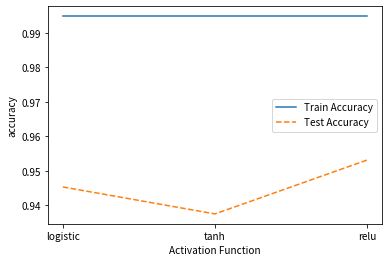

In [29]:
plt.plot(para_function, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

- 시각화 결과를 보면 train 정확도가 0.995로 활성화함수가 바뀜에도 같고 test 정확도가 바뀌는데 그 중 relu가 가장 높다. 이것을 보면 설정한 hidden layer의 노드 수인 60개인 모델이 과적합인 것으로 판단된다.

# 3. scaler 적용 후 solver 변경

- 가중치를 최적화하는 방법에 다양한 방법들이 많이 개발되고 있다. 이는 local minimum에서 벗어나 global minimum에 도달하기 위한 방법이다. 신경망 모델의 학습 결과에 따른 손실함수 값을 최소화하는 하이퍼 파라미터인데 초기값 설정 및 방법에 따라 모델의 성능 차이가 크다. 

In [30]:
train_accuracy = []
test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']
for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver,activation='relu', hidden_layer_sizes = (60,60), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.945
1,sgd,0.974,0.891
2,adam,0.995,0.953


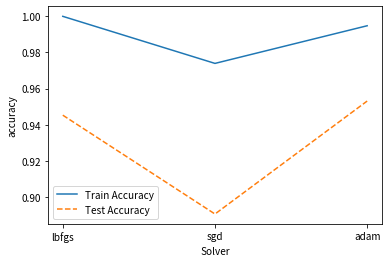

In [32]:
plt.plot(para_solver, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

- 가중치 최적화 방법을 변경한 결과 sgd가 가장 성능이 안좋은 것을 알 수 있다. lbfgs는 train data의 정확도가 1이고 test data의 정확도가 0.945이다. adam train data의 정확도가 0.995이고 test data의 정확도가 0.953이다. train data에 과적합이 되어있지만 최대한 이를 줄이고자 train과 test의 차이가 그나마 적은 adam으로 설정한다.

# 4. scaler 적용 후 Mini batch 변경

- 미니배치(Mini batch) : 딥러닝 모델을 전체 데이터로 한꺼번에 돌리기에는 컴퓨팅 파워가 모자를 수 있고 train data에 과적합될 가능성이 있으니 전체 학습 데이터를 배치 크기로 등분하여 각 배치 데이터를 순차적으로 실행하는 방법이다.

- Batch GD : mini batch == 전체데이터

- S-GD : mini batch == 1

- 미니 배치의 크기에 따라 모델의 성능이 변화한다. 

In [33]:
df_scaled_train_x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
60,-0.684425,-1.202452,-0.687733,-0.686934,-0.387881,-0.670055,-0.344959,-0.771530,-0.166590,-0.084773,...,-0.729093,-1.113400,-0.711667,-0.712781,0.434793,-0.475061,-0.242989,-0.718402,1.152247,-0.041188
214,0.010775,-0.266213,0.156985,-0.125553,1.753120,1.980982,1.998539,1.373372,1.848565,1.859859,...,-0.228524,-0.505844,-0.106440,-0.340892,0.744084,1.119668,1.561190,1.012305,1.724017,0.890236
27,1.318286,-0.717442,1.230813,1.347274,-0.344301,-0.274028,0.360794,0.538404,-1.081244,-1.100272,...,1.319570,-0.671390,1.213750,1.269633,0.795632,-0.018362,0.294108,0.978072,-0.522633,-0.828433
65,0.000079,-1.542684,-0.040723,-0.117632,-0.333055,-0.501279,-0.599772,-0.183524,-0.188454,-0.758986,...,-0.201466,-1.320333,-0.248486,-0.329173,-0.660613,-0.650538,-0.850142,-0.120364,-0.473542,-0.820451
218,-1.615726,-0.442361,-1.611147,-1.325227,-0.695746,-1.062231,-1.094165,-1.244095,1.349332,0.202186,...,-1.430664,-0.265801,-1.457825,-1.169203,-0.613360,-0.883174,-1.051903,-1.189033,0.177640,-0.095567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.615064,0.057127,0.595045,0.509163,0.052128,0.098889,-0.060745,0.255441,0.904759,-0.265863,...,0.577412,-0.192960,0.562010,0.457105,-0.291182,-0.434478,-0.460163,0.050801,0.288818,-0.544067
53,1.074966,-0.121434,1.071871,1.017651,0.480890,1.079328,1.411690,0.730165,-0.490909,0.597799,...,1.302175,-0.270767,1.018785,1.249320,1.431397,1.639240,2.316395,1.565989,-0.436001,2.122490
294,-1.307431,0.937868,-1.324276,-1.139974,-1.225724,-1.002004,-1.259475,-1.411616,0.394593,0.083780,...,-1.065383,0.699337,-1.095190,-0.981071,-0.742231,-0.831159,-1.359030,-1.679608,0.011596,-0.543568
211,1.513476,-1.260364,1.482794,1.477590,0.052128,0.494566,0.839011,1.404572,0.383661,-0.118205,...,0.801606,-0.891567,0.804324,0.627423,-0.793780,-0.141254,0.231058,0.760766,-0.463435,-0.024725


In [34]:
train_accuracy = []
test_accuracy = []
para_batch = [10 * batch for batch in range(1,20)]
for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver = 'adam',activation='relu', hidden_layer_sizes = (60,60), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,10,1.00,0.953
1,20,1.00,0.953
2,30,1.00,0.953
3,40,1.00,0.953
4,50,1.00,0.953
5,60,1.00,0.953
6,70,1.00,0.953
7,80,1.00,0.953
8,90,1.00,0.953
9,100,1.00,0.953


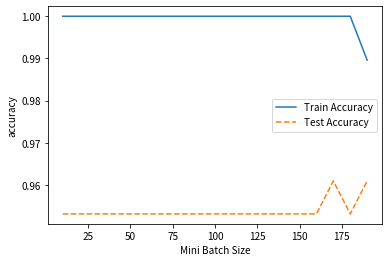

In [36]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle = '--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Mini Batch Size')
plt.legend()

- 미니 배치의 사이즈를 조정하면서 정확도를 본 결과 train dataset의 정확도는 1로 수렴하다 mini batach size가 190이 되면서 0.99로 떨어진다. test dataset의 정확도는 계속 바뀌는데 정확도가 mini batach size가 170 때 TestAccuracy가 0.945으로 가장 높으므로 170으로 설정한다.

In [37]:
nn_final = MLPClassifier(batch_size= 170, activation = "relu", solver = "adam", hidden_layer_sizes = (60,60), random_state =1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
print("Accuracy on training setn_neighbors가: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n {}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training setn_neighbors가: 1.000
Accuracy on test set: 0.961
Confusion matrix: 
 [[31  0]
 [ 5 92]]
              precision    recall  f1-score   support

          양성      0.861     1.000     0.925        31
          음성      1.000     0.948     0.974        97

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 파라미터 튜닝 결과를 모델에 전부 넣고 최종모델을 설정하였다. 최종모델의 batch_size는 170, 활성화함수는 "relu", solver 는 "adam", hidden_layer_sizes 는 (60,60)으로 설정하였다. 해당 모델의 train 정확도는 1, test 정확도는 0.961이다. 또한 유방암 데이터이기 때문에 recall의 값이 중요한데 recall 값 또한 상당히 높기 때문에 해당 모델이 적합하다는 것을 알 수 있다.

# 과제물_KNN

- 거리 기반으로 이웃을 결정하며 새로운 사건이 발생했을 때 가장 근접한 k-이웃의 값을 평균해서 예측하거나 빈도가 많은 클래스로 분류하는 탐색적 기법이다. 경험적으로 k의 개수가 10개 미만은 k의 수가 홀수여야하지만 10개 이상부터는 k 가 짝수여도 상관이 없다고 한다.

- 새로운 데이터가 주어졌을 때 가장 가까운 k-이웃을 찾고 그 이웃의 값을 평균하거나 다수 클래스로 분류하여 새로운 데잍의 값으로 결정한다.

- n_neighbors가 작으면 과대적합의 위험이 증가하고 n_neighbors가 크면 과소적합될 가능성이 증가한다.

- 결정경계 : 일정한 간격으로 생성한 데이터의 예측값을 이용해 결정경계를 구분한다. 

In [38]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


- default 모델의 train 성능은 0.932이고 test 성능은 0.914이다. 일반화성능은 나쁘지 않지만 두 데이터셋에 대한 모델의 정확도가 그리 높지 않아 과소적합이라고 판단한다.

## 이웃수 증가에 따른 정확도 변화

In [39]:
train_accuracy = []; test_accuracy =[]
para_n_neighbors = [i for i in range(1,16)]


for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"]=train_accuracy
df_accuracy_neighbors["TestAccuracy"]=test_accuracy

In [40]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.898
1,2,0.922,0.875
2,3,0.932,0.898
3,4,0.932,0.906
4,5,0.932,0.914
5,6,0.927,0.930
6,7,0.927,0.898
7,8,0.906,0.883
8,9,0.911,0.906
9,10,0.906,0.938


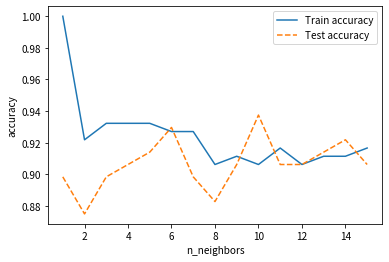

In [41]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label= "Train accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label= "Test accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

- n_neighbors의 개수에 따라 정확도의 변화를 보기 위해 시각화를 진행하였다. n_neighbors가 6일 때 train, test데이터셋의 정확도가 그렇게 떨어질 뿐만 아니라 두 데이터셋의 차이도 얼마 나지 않는다. n_neighbors가 더욱 증가한다면 정확도가 감소할 것이기 때문에 6으로 설정한다.

## 가중치별 이웃 수 증가에 따른 정확도 변화

In [42]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*2
para_weights = (["uniform"])*10 + (['distance']*10)
for(v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.922,0.875
2,3,uniform,0.932,0.898
3,4,uniform,0.932,0.906
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.930
6,7,uniform,0.927,0.898
7,8,uniform,0.906,0.883
8,9,uniform,0.911,0.906
9,10,uniform,0.906,0.938


In [43]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights", values = ["TrainAccuracy", "TestAccuracy"])

In [44]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.921875,0.898438,0.875000
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.932292,0.898438,0.906250
5,1.0,0.932292,0.914062,0.914062


<AxesSubplot:xlabel='Neighbors'>

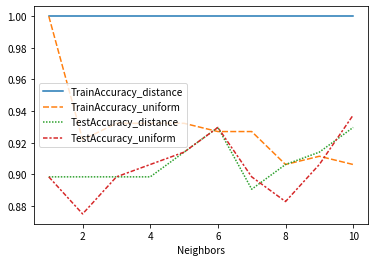

In [45]:
sns.lineplot(data = df_accuracy_weights_pivot)

- weight를 distance로 설정하였을 때 train 데이터가 1.0으로 수렴하는 것을 볼 수 있다. 이는 test 데이터를 맞추지 못하는 과적합이라고 판단된다. 그래서 uniform의 훈련데이터와 테스트데이터를 보았더니 neighbors가 6일 때의 train, test의 성능이 좋고 일반화가 된 모델이라고 판단된다. 

## 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [46]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*3
para_metric = ["minkowski"]*10 + ['euclidean']*10 + ["manhattan"]*10

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.898
1,2,minkowski,0.922,0.875
2,3,minkowski,0.932,0.898
3,4,minkowski,0.932,0.906
4,5,minkowski,0.932,0.914
5,6,minkowski,0.927,0.930
6,7,minkowski,0.927,0.898
7,8,minkowski,0.906,0.883
8,9,minkowski,0.911,0.906
9,10,minkowski,0.906,0.938


<AxesSubplot:xlabel='Neighbors'>

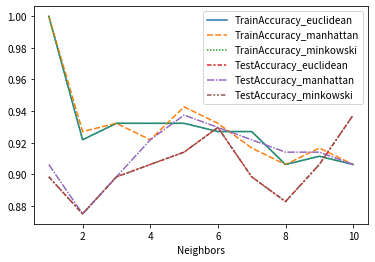

In [47]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

- 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화를 시각화 해 본 결과 manhattan 계산 방법이 train, test의 정확도가 높은 편이고 데이터셋에 따라 정확도의 변화도 비슷한 것으로 보아 일반화성능도 나쁘지 않은 것으로 보인다. 그렇기 때문에 manhattan 계산방법을 선택한다.

In [48]:
knn_model =KNeighborsClassifier(n_neighbors= 4 , weights= "uniform", metric="manhattan")
knn_model.fit(df_train_x,df_train_y)
y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(knn_model.score(df_train_x,df_train_y)))

print("Accuracy on test set: {:.3f}\n".format(knn_model.score(df_test_x,df_test_y)))

print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set: 0.932
Accuracy on test set: 0.906

Confusion matrix:
[[30  1]
 [11 86]]
              precision    recall  f1-score   support

          양성      0.732     0.968     0.833        31
          음성      0.989     0.887     0.935        97

    accuracy                          0.906       128
   macro avg      0.860     0.927     0.884       128
weighted avg      0.926     0.906     0.910       128



- default 모델의 training set 정확도는 0.932이고 test set의 정확도는 0.914이다. 파라미터 튜닝 결과 train set은 성능이 조금 올랐지만 이에 비해 test set이 정확도가 떨어졌다. 하지만 유방암데이터에서 중요한 recall의 값이 상당히 높은 값이므로 모델이 적용할 만하다고 판단하였다.